# Lead+Scoring+Case+Study

Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Goals and Objectives
There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Reading and cleaning the data

In [2]:
# Importing  datasets
df = pd.read_csv(r"D:\Study\DataScience\Lead scoring case study\Leads.csv")


In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe
df.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Check for Nulls
df.isnull().sum()*100.0/len(df)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
# dropping the columns more than 40 % Null,Lead Quality
df.drop(['Lead Quality'],axis=1,inplace=True)
df.drop(['Asymmetrique Activity Index'],axis=1,inplace=True)
df.drop(['Asymmetrique Profile Index'],axis=1,inplace=True)
df.drop(['Asymmetrique Activity Score'],axis=1,inplace=True)
df.drop(['Asymmetrique Profile Score'],axis=1,inplace=True)

In [9]:
#Check unique values in Prospect ID  as looks like identifier
df['Prospect ID'].nunique()

9240

In [10]:
#Check unique values in Prospect ID  as looks like identifier
df['Lead Number'].nunique()

9240

In [11]:
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [12]:
df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

### Data Cleaning 

In [13]:
#Looks like there are lot of columns having values 'Select', should be replaced by NaN
df = df.replace('Select', np.nan)

In [14]:
#Check for Nulls
df.isnull().sum()*100.0/len(df)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [15]:
df.drop(['How did you hear about X Education', 'Lead Profile'], 1, inplace = True)

In [16]:
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [17]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [18]:
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [19]:
#Handle Missing values for Unknown values columns which are higher
df['Country'] = df['Country'].fillna('Unknown') 
df['Specialization'] = df['Specialization'].fillna('Other')
#We can mention
df['What is your current occupation'] = df['What is your current occupation'].fillna('Other')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Unknown')
df['Tags'] = df['Tags'].fillna('Unknown')
#As There already a category as Other Cities
df['City'] = df['City'].fillna('Other Cities')

In [20]:
df.Country.value_counts()

India                   6492
Unknown                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

data is mostly skewed, and is mostly for India . Hence doing comparison based on Country won't be relevant Hence dropping the column

In [21]:
df.drop(['Country'], 1, inplace = True)

In [22]:
#Check other columns also for distinct records
df['Lead Origin'].value_counts()


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [23]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [24]:
#Observed some inconsistency in data
df['Lead Source'] = df['Lead Source'].replace('google','Google')

In [25]:
df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [26]:
#Aggregate small values to Other:
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Social Media','Live Chat' ,'Press_Release'
                                                  ,'Pay per Click Ads','blog','WeLearn','welearnblog_Home','youtubechannel'
                                                 ,'testone','NC_EDM'],'Others')

In [27]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [28]:
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                        'View in browser link Clicked','Email Received','Email Marked Spam'
                                                         ,'Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

In [29]:
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [30]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable'
        ,'Had a Phone Conversation','Approached upfront','Email Marked Spam','Visited Booth in Tradeshow'
        ,'Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'],'Others')

In [31]:
df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [32]:
df.isnull().sum()

Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
Through Recommendations                       

In [33]:
#Lets enrich the Lead source and Last activity with Mod
df['Lead Source'].fillna(df['Lead Source'].mode()[0], inplace =True) 
df['Last Activity'].fillna(df['Last Activity'].mode()[0], inplace =True) 
df['TotalVisits'].fillna(df['TotalVisits'].median(),inplace = True)
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(),inplace = True)

### 2. EDA 
 Analysis on Categorical and Numerical fields

Countplot of Lead Origin


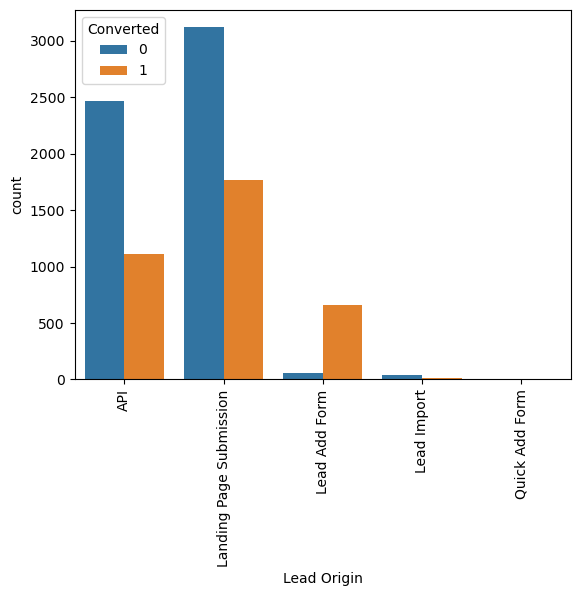

Countplot of Lead Source


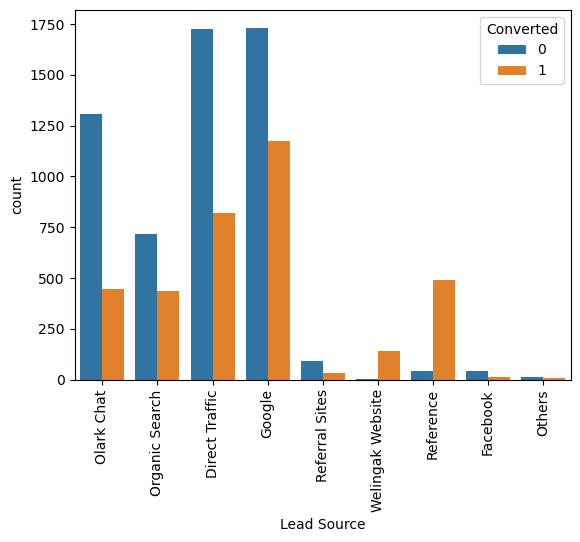

Countplot of Do Not Email


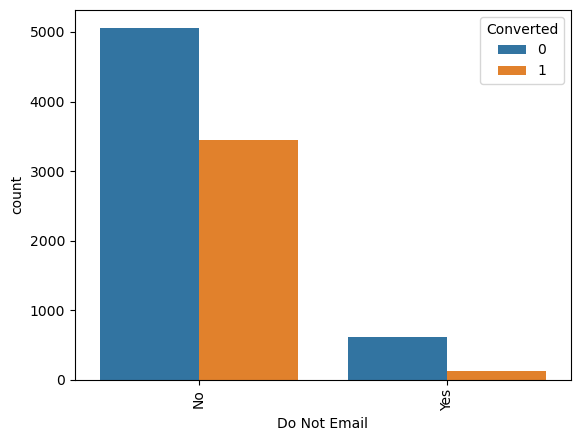

Countplot of Do Not Call


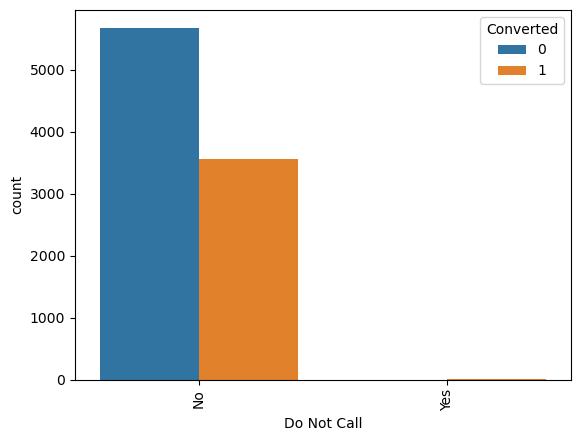

Countplot of What is your current occupation


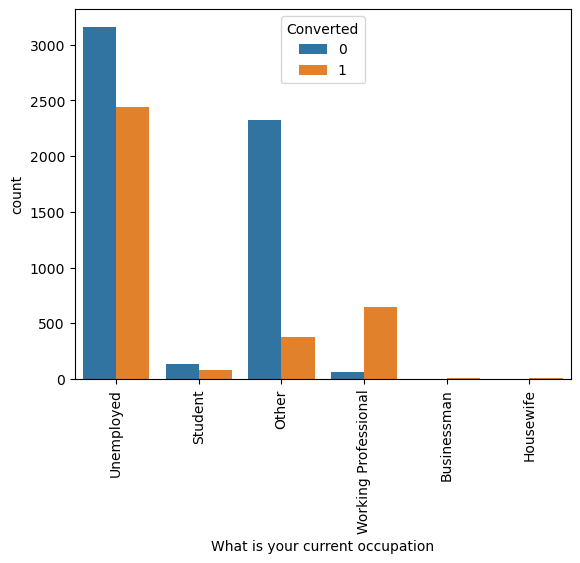

Countplot of Specialization


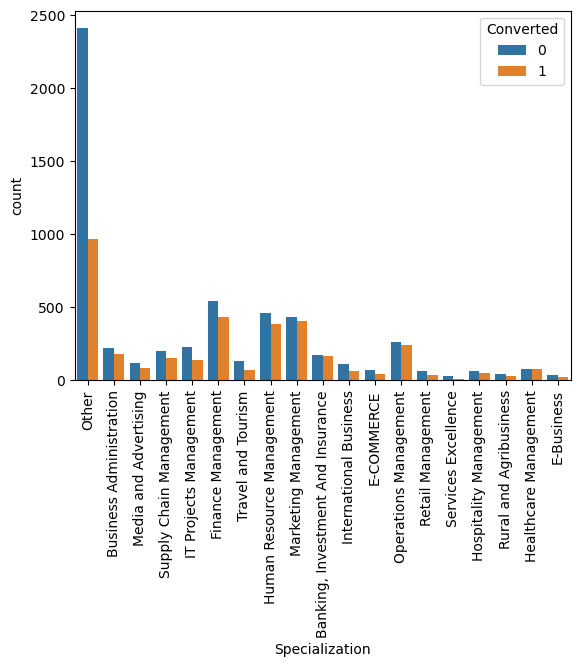

Countplot of What matters most to you in choosing a course


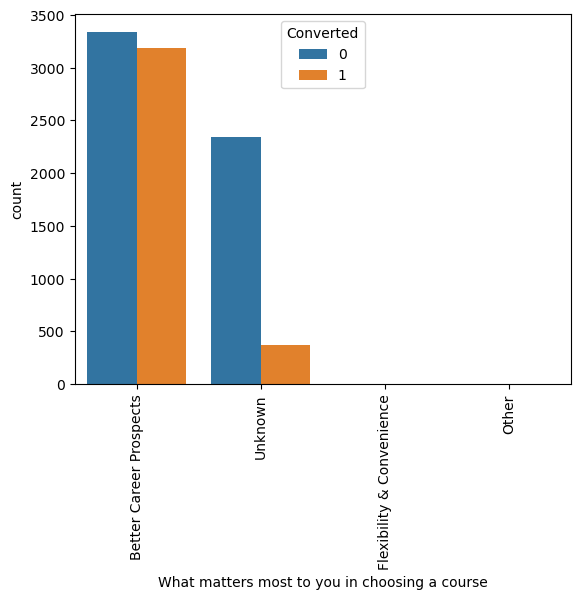

Countplot of Search


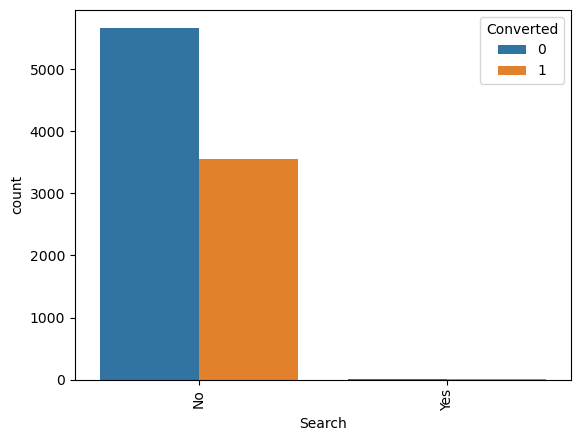

Countplot of Magazine


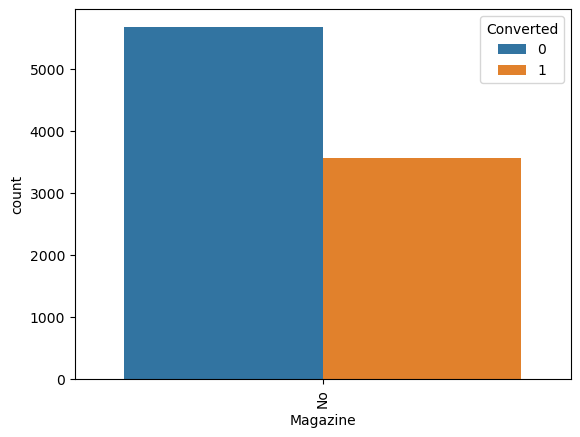

Countplot of Newspaper Article


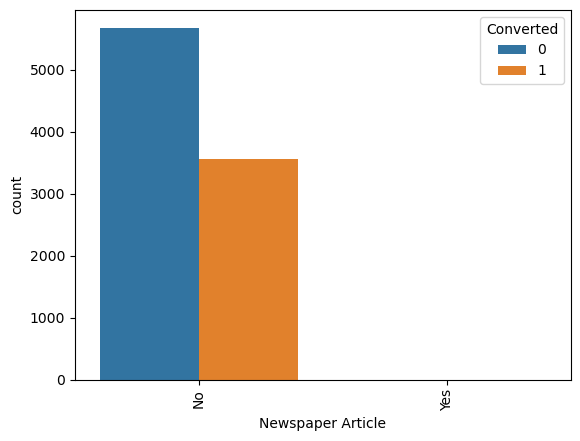

Countplot of X Education Forums


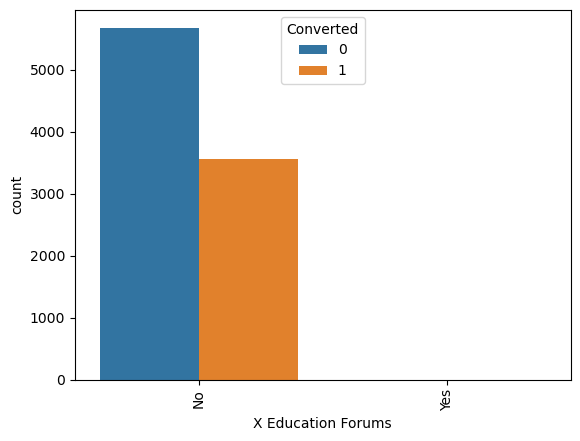

Countplot of Newspaper


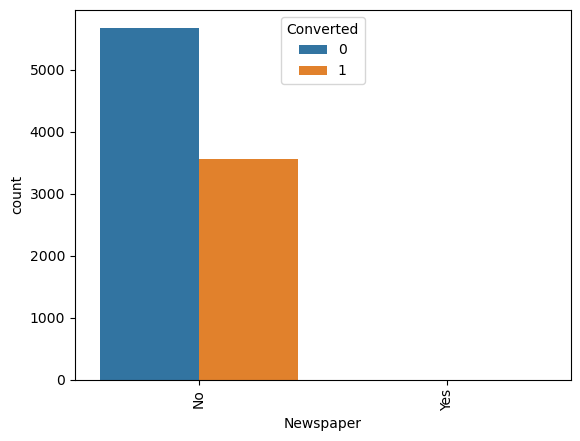

Countplot of Digital Advertisement


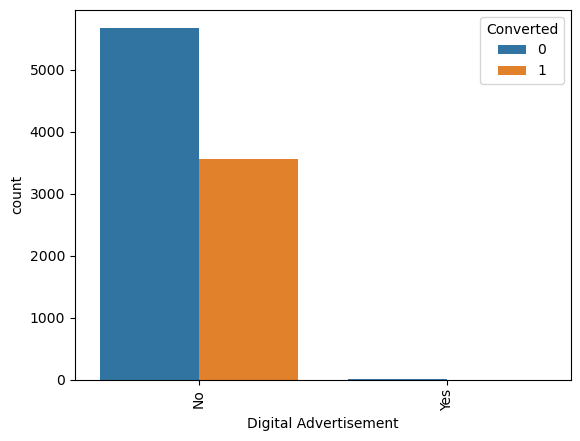

Countplot of Through Recommendations


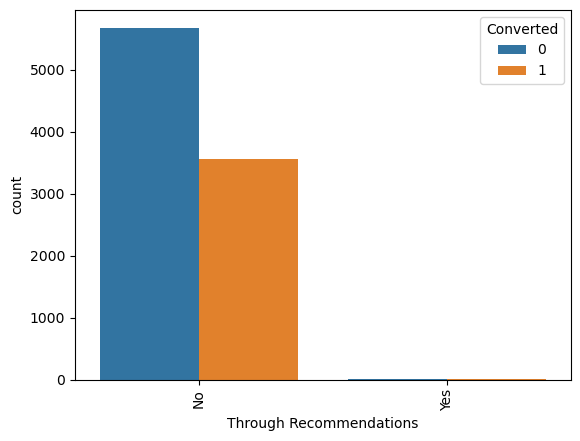

Countplot of Update me on Supply Chain Content


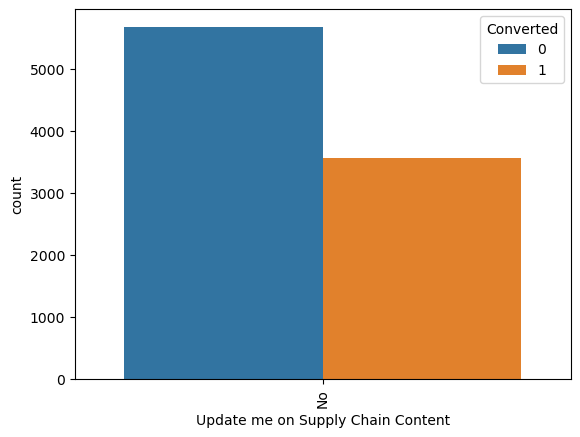

Countplot of Get updates on DM Content


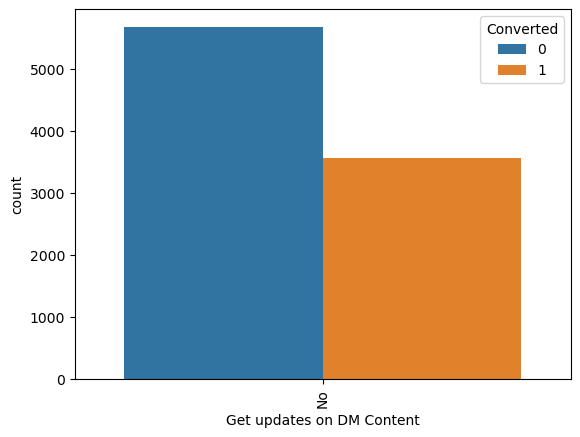

Countplot of City


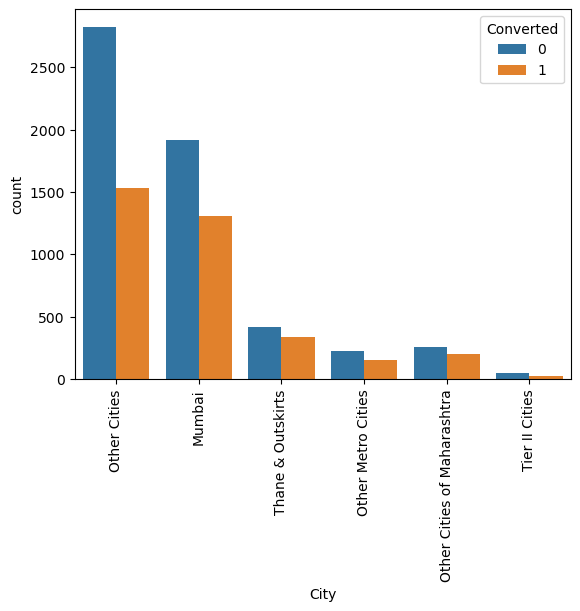

Countplot of A free copy of Mastering The Interview


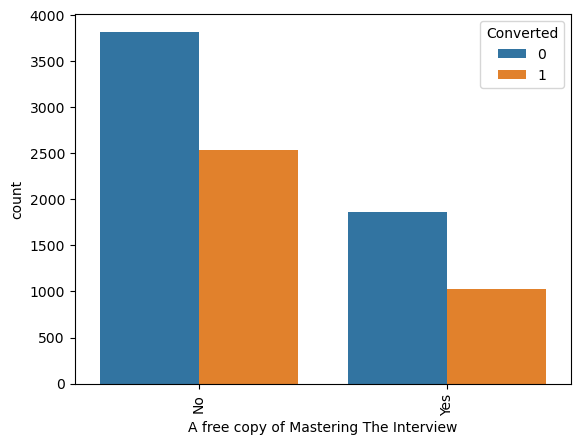

Countplot of Tags


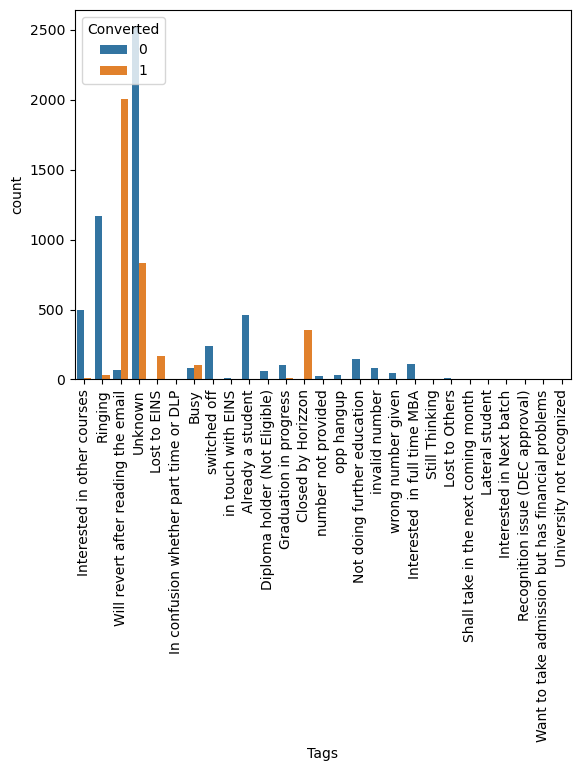

Countplot of Last Notable Activity


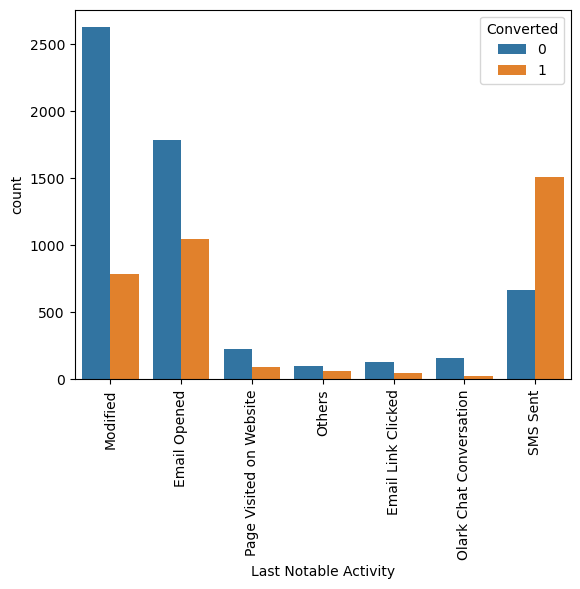

In [34]:
# Since Converted is target Analysis, Lets plot Count plot on categorical variables

cat_cols= ["Lead Origin","Lead Source","Do Not Email","Do Not Call","What is your current occupation","Specialization"
,"What matters most to you in choosing a course","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement"
,"Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content","City"
           ,"A free copy of Mastering The Interview","Tags","Last Notable Activity"]

for i in cat_cols:
    print("Countplot of",i)
    sns.countplot(df[i],hue = df.Converted)
    plt.xticks(rotation=90)
    plt.show()

#Unemployed people are likely to convert more.
#As per observation API, Landing Page submission and Lead Add Form are more. Percentage wise Lead Add form are more converted.
#Those who said, will revert after reading the mail are more converted.
#Those who has last activity as SMS sent has more people converted

In [35]:
# Inbalanced Columns can be dropped

df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [36]:
df.drop(['Do Not Call'], 1, inplace = True)

In [37]:
df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [38]:
df.drop(['Search'], 1, inplace = True)
#Dropping Magazine as only one column value No
df.drop(['Magazine'], 1, inplace = True)

In [39]:
df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [40]:
df.drop(['Newspaper Article'], 1, inplace = True)

In [41]:
#X Education Forums
df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [42]:
df.drop(['X Education Forums'], 1, inplace = True)

In [43]:
#Newspaper
df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [44]:
df.drop(['Newspaper'], 1, inplace = True)

In [45]:
#Digital Advertisement
df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [46]:
df.drop(['Digital Advertisement'], 1, inplace = True)

In [47]:
#Through Recommendations
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [48]:
df.drop(['Through Recommendations'], 1, inplace = True)
#What matters most to you in choosing a course' Also have single value and other is missing
df.drop(['What matters most to you in choosing a course'], 1, inplace = True)

In [49]:
df.drop(['Update me on Supply Chain Content','Get updates on DM Content','Receive More Updates About Our Courses'
         ,'I agree to pay the amount through cheque'], 1, inplace = True)

In [50]:
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [51]:
df['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

In [52]:
df['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

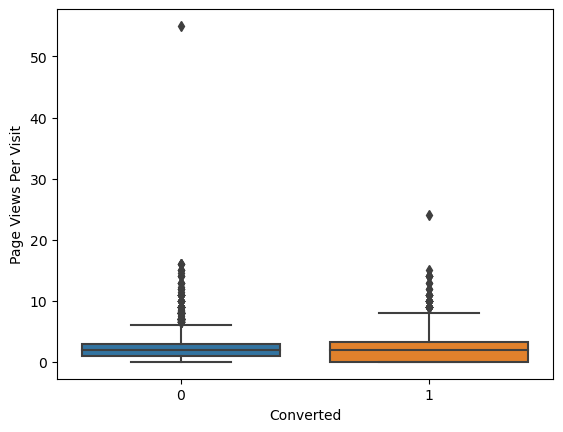

In [53]:
#There are "TotalVisits" and "Total Time Spent on Website" seems to be numerical variable. Lets compare it against the boxplot

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =df)


<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

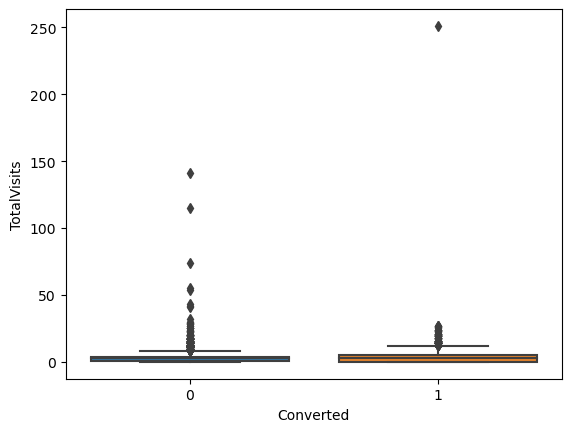

In [54]:
#There are "TotalVisits" and "Total Time Spent on Website" seems to be numerical variable. Lets compare it against the boxplot

sns.boxplot(y = 'TotalVisits', x = 'Converted', data =df)


<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

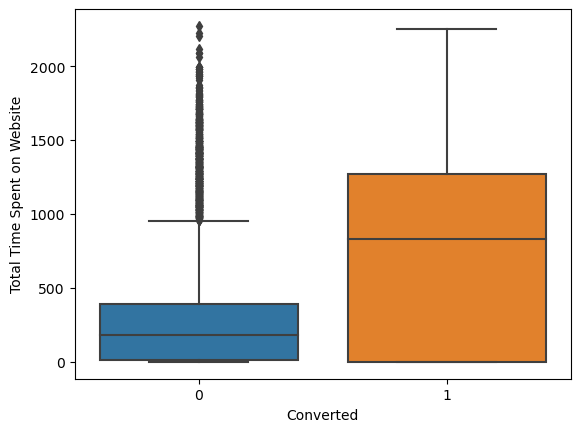

In [55]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data =df)

#There seems to be outliers in case of TotalVisits and "Page Views Per Visit". Ideally we should be dropping the outliers

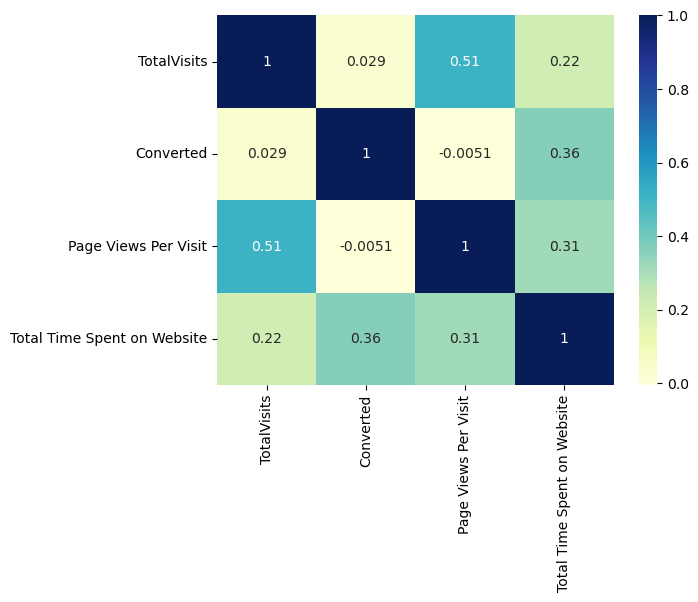

In [56]:
# heatmap
sns.heatmap(df[['TotalVisits','Converted',"Page Views Per Visit",'Total Time Spent on Website']].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [57]:
#Data preparation for regression
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Interested in other courses,Other Cities,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Other,Unemployed,Ringing,Other Cities,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Will revert after reading the email,Mumbai,No,Modified


#Converting some binary variables (Yes/No) to 0/1

In [58]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [59]:
df.shape

(9240, 14)

### 3. Create Dummy Variables

In [60]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin','Lead Source', 'Last Activity','Specialization','What is your current occupation','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [61]:
#Drop Coulns on which we created the Dummy variabes
df.drop(['Lead Origin','Lead Source', 'Last Activity','Specialization','What is your current occupation','City','Last Notable Activity'], 1, inplace = True)

In [62]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Tags,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,Interested in other courses,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,Ringing,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,Will revert after reading the email,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,Ringing,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,Will revert after reading the email,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


### 4. Test Train split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Tags,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,Interested in other courses,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,Ringing,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,Will revert after reading the email,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,Ringing,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,Will revert after reading the email,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [65]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 5: Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
# Scale the three numeric features
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Tags,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0,-0.656434,-0.885371,-1.085519,Ringing,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
6795,0,0.100767,0.005716,-0.470569,Unknown,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3516,0,0.290067,-0.691418,0.070401,Ringing,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
8105,0,0.290067,1.365219,1.226321,Ringing,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3934,0,-0.656434,-0.885371,-1.085519,Unknown,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0


In [69]:
### Checking the Convert Rate
Convert = (sum(df['Converted'])/len(df['Converted'].index))*100
Convert

38.53896103896104

 we have 38 percent convert rate

#### Looking at Correlations

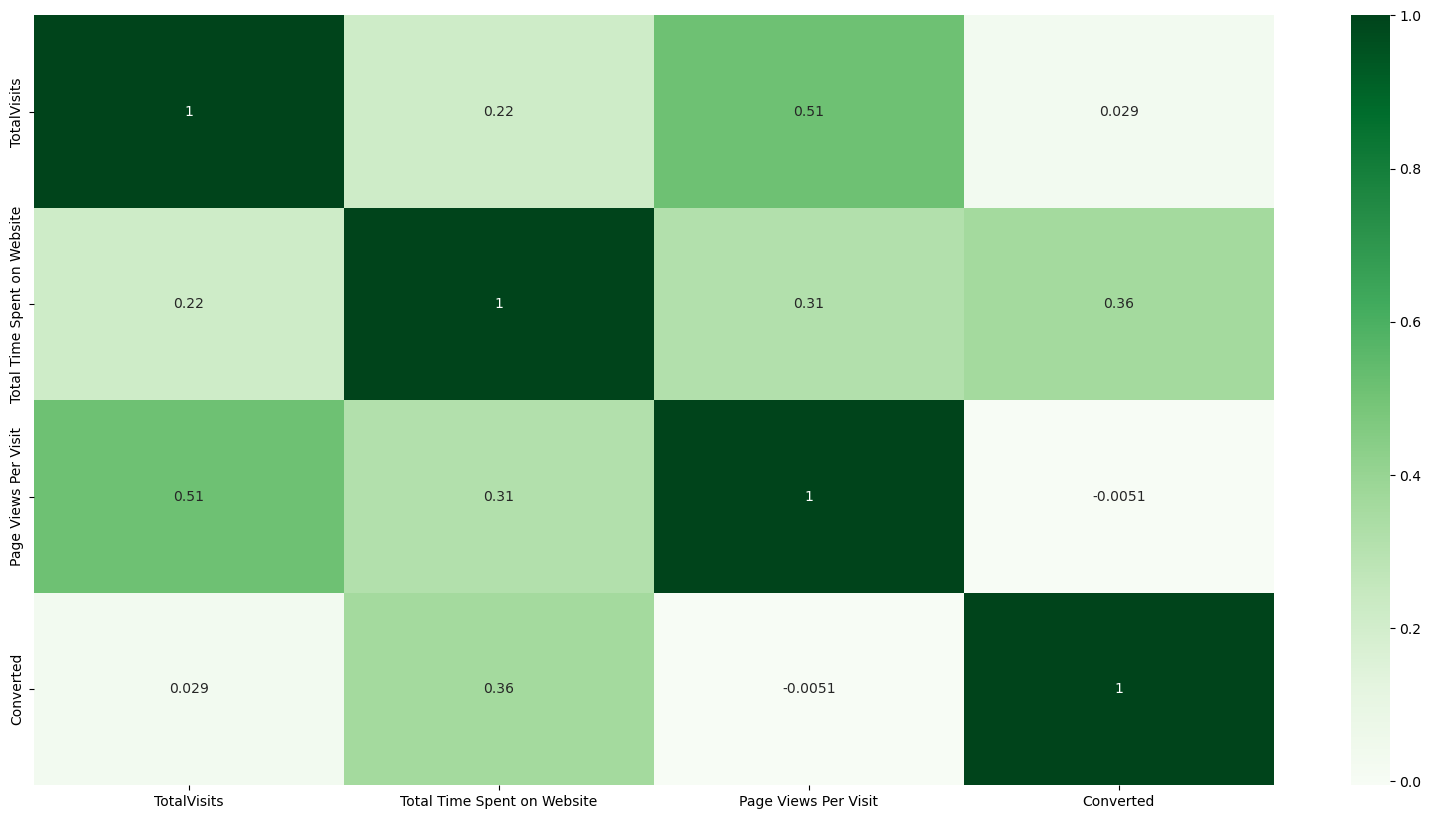

In [70]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']].corr(),annot = True,cmap="Greens")
plt.show()

### 6: Feature Selection Using RFE

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [72]:
#Drop Tags column as causing failure # Open Question : Should it be converted to Dummy variables?
X_train.drop(['Tags'], 1, inplace = True)

In [73]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [74]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True])

In [75]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('A free copy of Mastering The Interview', False, 14),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Origin_Quick Add Form', False, 21),
 ('Lead Source_Facebook', False, 12),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Others', False, 16),
 ('Lead Source_Reference', False, 13),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 18),
 ('Last Activity_Email Link Clicked', False, 4),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 11),
 ('Last Activity_Olark Chat Conversation', False, 17),
 ('Last Activity_Others', False, 2),
 ('Last Activity_Page Vis

In [76]:
col = X_train.columns[rfe.support_]

In [77]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and

### Assessing the model with StatsModels

In [78]:
import statsmodels.api as sm

In [79]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.3
Date:                Sun, 21 May 2023   Deviance:                       5160.6
Time:                        22:03:03   Pearson chi2:                 7.07e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4123
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9547      0.142     -6.739      0.000      -1.232      -0.677
Do Not Email                                            -1.3994      0.190     -7.359      0.000      -1.772      -1.027
Total Time Spent on Website                              1.0728      0.040     26.648      0.000       0.994       1.152
Lead Origin_Landing Page Submission                     -1.0193      0.129     -7.921      0.000      -1.272      -0.767
Lead Origin_Lead Add Form                                2.8994      0.205     14.127      0.000       2.497       3.302
Lead Source_Olark Chat                                   1.0163      0.122      8.349      0.000       0.778       1.255
Lead Source_Welingak Website                             2.4161      0.746      3.239      0.001       0.954       3.878
Last Activity_Email Opened                               0.8858      0.096      9.187      0.000       0.697       1.075
Last Activity_SMS Sent                                   1.2185      0.158      7.705      0.000       0.909       1.528
Specialization_Hospitality Management                   -1.0559      0.334     -3.159      0.002      -1.711      -0.401
Specialization_Other                                    -1.0095      0.124     -8.163      0.000      -1.252      -0.767
What is your current occupation_Housewife               22.7796   1.35e+04      0.002      0.999   -2.63e+04    2.64e+04
What is your current occupation_Other                   -0.9859      0.088    -11.146      0.000      -1.159      -0.813
What is your current occupation_Working Professional     2.4292      0.192     12.621      0.000       2.052       2.806
Last Notable Activity_Others                             2.1054      0.286      7.353      0.000       1.544       2.667
Last Notable Activity_SMS Sent                           1.0219      0.152      6.719      0.000       0.724       1.320
========================================================================================================================
"""

#Checking VIFs

In [80]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,5.71
14,Last Notable Activity_SMS Sent,4.93
2,Lead Origin_Landing Page Submission,2.60
9,Specialization_Other,2.42
6,Last Activity_Email Opened,2.08
4,Lead Source_Olark Chat,1.91
11,What is your current occupation_Other,1.64
3,Lead Origin_Lead Add Form,1.59
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


In [82]:
#Since "What is your current occupation_Housewife" has high P value, dropping it from the module and checking again
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [83]:
col=col.drop('What is your current occupation_Housewife')

In [84]:
X_train_sm2 = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.9
Date:                Sun, 21 May 2023   Deviance:                       5173.8
Time:                        22:03:22   Pearson chi2:                 7.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4111
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9467      0.141     -6.692      0.000      -1.224      -0.669
Do Not Email                                            -1.4039      0.190     -7.385      0.000      -1.776      -1.031
Total Time Spent on Website                              1.0717      0.040     26.651      0.000       0.993       1.151
Lead Origin_Landing Page Submission                     -1.0145      0.129     -7.890      0.000      -1.267      -0.762
Lead Origin_Lead Add Form                                2.9154      0.205     14.220      0.000       2.514       3.317
Lead Source_Olark Chat                                   1.0152      0.122      8.343      0.000       0.777       1.254
Lead Source_Welingak Website                             2.3999      0.746      3.217      0.001       0.938       3.862
Last Activity_Email Opened                               0.8849      0.096      9.201      0.000       0.696       1.073
Last Activity_SMS Sent                                   1.2104      0.158      7.658      0.000       0.901       1.520
Specialization_Hospitality Management                   -1.0628      0.334     -3.180      0.001      -1.718      -0.408
Specialization_Other                                    -1.0134      0.124     -8.199      0.000      -1.256      -0.771
What is your current occupation_Other                   -0.9902      0.088    -11.203      0.000      -1.163      -0.817
What is your current occupation_Working Professional     2.4203      0.192     12.580      0.000       2.043       2.797
Last Notable Activity_Others                             2.1003      0.286      7.336      0.000       1.539       2.661
Last Notable Activity_SMS Sent                           1.0212      0.152      6.713      0.000       0.723       1.319
========================================================================================================================
"""

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,5.71
13,Last Notable Activity_SMS Sent,4.93
2,Lead Origin_Landing Page Submission,2.60
9,Specialization_Other,2.42
6,Last Activity_Email Opened,2.08
4,Lead Source_Olark Chat,1.91
10,What is your current occupation_Other,1.64
3,Lead Origin_Lead Add Form,1.59
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.26


In [86]:
#Drop the "Last Activity_SMS Sent" column and check the module again
col=col.drop('Last Activity_SMS Sent')

In [87]:
X_train_sm3 = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.2
Date:                Sun, 21 May 2023   Deviance:                       5230.5
Time:                        22:03:38   Pearson chi2:                 7.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4059
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6858      0.135     -5.083      0.000      -0.950      -0.421
Do Not Email                                            -1.4359      0.189     -7.604      0.000      -1.806      -1.066
Total Time Spent on Website                              1.0770      0.040     26.887      0.000       0.998       1.155
Lead Origin_Landing Page Submission                     -0.9987      0.128     -7.824      0.000      -1.249      -0.748
Lead Origin_Lead Add Form                                3.0302      0.206     14.714      0.000       2.627       3.434
Lead Source_Olark Chat                                   0.9673      0.120      8.049      0.000       0.732       1.203
Lead Source_Welingak Website                             2.5075      0.750      3.344      0.001       1.038       3.977
Last Activity_Email Opened                               0.6132      0.086      7.108      0.000       0.444       0.782
Specialization_Hospitality Management                   -1.0852      0.336     -3.226      0.001      -1.745      -0.426
Specialization_Other                                    -1.0162      0.123     -8.284      0.000      -1.257      -0.776
What is your current occupation_Other                   -0.9538      0.088    -10.872      0.000      -1.126      -0.782
What is your current occupation_Working Professional     2.3810      0.191     12.494      0.000       2.007       2.755
Last Notable Activity_Others                             1.8490      0.283      6.534      0.000       1.294       2.404
Last Notable Activity_SMS Sent                           1.9617      0.095     20.580      0.000       1.775       2.148
========================================================================================================================
"""

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.36
8,Specialization_Other,2.35
6,Last Activity_Email Opened,1.92
4,Lead Source_Olark Chat,1.91
12,Last Notable Activity_SMS Sent,1.69
9,What is your current occupation_Other,1.62
3,Lead Origin_Lead Add Form,1.54
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.25


All the variables have P less than 0.05 now, we have 12 variables now

## Getting the predicted values on the train set

In [89]:
y_train_pred = res3.predict(X_train_sm3)
y_train_pred[:10]

1871    0.485318
6795    0.110926
3516    0.296068
8105    0.851633
3934    0.254458
4844    0.990664
3297    0.135024
8071    0.988386
987     0.118848
7423    0.915761
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.48531776, 0.11092611, 0.29606759, 0.85163254, 0.25445833,
       0.99066364, 0.13502355, 0.98838557, 0.11884796, 0.91576073])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [91]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ProspectID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID
0,0,0.485318,1871
1,0,0.110926,6795
2,0,0.296068,3516
3,0,0.851633,8105
4,0,0.254458,3934


In [92]:
#Consider 0.5 as threshold differentiator
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Converted,Converted_Prob,ProspectID,predicted
0,0,0.485318,1871,0
1,0,0.110926,6795,0
2,0,0.296068,3516,0
3,0,0.851633,8105,1
4,0,0.254458,3934,0


In [93]:
from sklearn import metrics

In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3558  444]
 [ 742 1724]]


##### Predicted     Not Converted    Converted
##### Actual
##### not_Converted        3558       444
##### Converted            742        1724  

In [95]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8166357452071737

## Metrics beyond simply accuracy

In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6991078669910786

In [98]:
# Let us calculate specificity
TN / float(TN+FP)

0.889055472263868

In [99]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.11094452773613193


In [100]:
# positive predictive value 
print (TP / float(TP+FP))

0.7952029520295203


In [101]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8274418604651163


## Step 9: Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [102]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

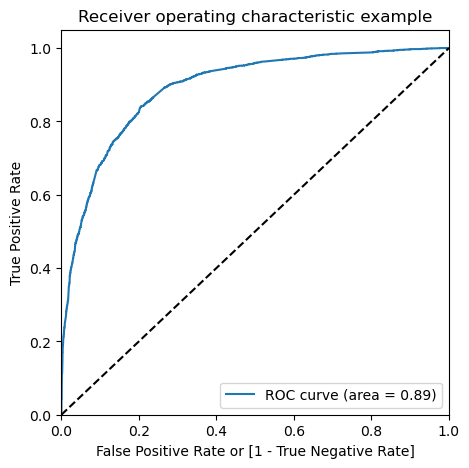

In [104]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [105]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.485318,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.110926,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.296068,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.851633,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.254458,3934,0,1,1,1,0,0,0,0,0,0,0
5,1,0.990664,4844,1,1,1,1,1,1,1,1,1,1,1
6,0,0.135024,3297,0,1,1,0,0,0,0,0,0,0,0
7,1,0.988386,8071,1,1,1,1,1,1,1,1,1,1,1
8,0,0.118848,987,0,1,1,0,0,0,0,0,0,0,0
9,1,0.915761,7423,1,1,1,1,1,1,1,1,1,1,1


In [106]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.616265  0.971208  0.397551
0.2   0.2  0.769790  0.912409  0.681909
0.3   0.3  0.807978  0.849554  0.782359
0.4   0.4  0.816017  0.779400  0.838581
0.5   0.5  0.816636  0.699108  0.889055
0.6   0.6  0.802876  0.607867  0.923038
0.7   0.7  0.788497  0.530008  0.947776
0.8   0.8  0.765461  0.435118  0.969015
0.9   0.9  0.721552  0.292376  0.986007


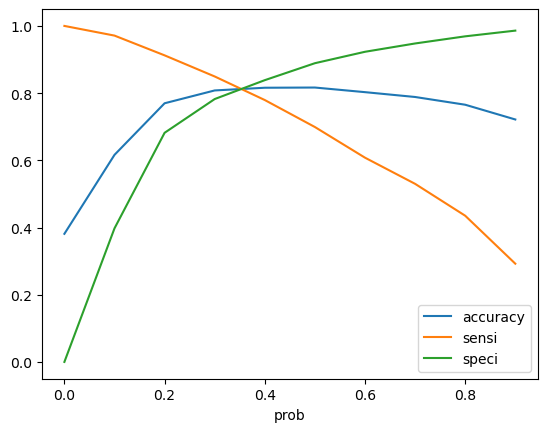

In [107]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [108]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ProspectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.485318,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.110926,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.296068,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.851633,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.254458,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [109]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8116883116883117

In [110]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3244,  758],
       [ 460, 2006]], dtype=int64)

In [111]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.813463098134631

In [113]:
# Let us calculate specificity
TN / float(TN+FP)

0.8105947026486756

In [114]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.18940529735132433


In [115]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7257597684515196


In [116]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8758099352051836


### 10: Precision and Recall

#Looking at the confusion matrix again

In [117]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3558,  444],
       [ 742, 1724]], dtype=int64)

Precision
TP / TP + FP

In [118]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7952029520295203

Recall
TP / TP + FN

In [119]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6991078669910786

Using sklearn utilities for the same

In [120]:
from sklearn.metrics import precision_score, recall_score

In [121]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7952029520295203

In [122]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6991078669910786

### Precision and recall tradeoff

In [123]:
from sklearn.metrics import precision_recall_curve

In [124]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [125]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

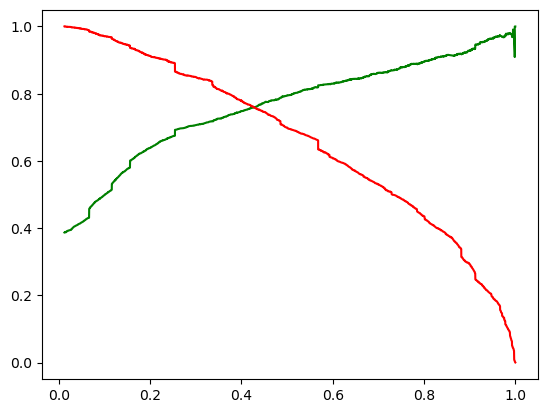

In [130]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


### Step 11: Making predictions on the test set

In [131]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [132]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Specialization_Hospitality Management,Specialization_Other,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Others,Last Notable Activity_SMS Sent
4269,0,0.964504,0,0,0,0,0,0,1,1,0,0,1
2376,0,-0.885371,0,1,0,0,0,0,1,0,0,0,1
7766,0,-0.777416,0,0,0,0,0,0,0,0,1,1,0
9199,0,-0.885371,0,0,1,0,0,0,1,0,0,0,0
4359,0,-0.885371,0,1,0,0,1,0,0,0,0,0,0


In [133]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [134]:
y_test_pred = res3.predict(X_test_sm)

In [135]:
y_test_pred[:10]

4269    0.585285
2376    0.911839
7766    0.937433
9199    0.156011
4359    0.881227
9186    0.629403
1631    0.492857
8963    0.180316
8007    0.051468
5324    0.410709
dtype: float64

In [136]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [137]:
# Let's see the head
y_pred_1.head()

,0
4269,0.585285
2376,0.911839
7766,0.937433
9199,0.156011
4359,0.881227


In [138]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [139]:
# Putting ProspectID to index
y_test_df['ProspectID'] = y_test_df.index

In [140]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [141]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [142]:
y_pred_final.head()

,Converted,ProspectID,0
0,1,4269,0.585285
1,1,2376,0.911839
2,1,7766,0.937433
3,0,9199,0.156011
4,1,4359,0.881227


In [143]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [144]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ProspectID','Converted','Converted_Prob'], axis=1)

In [145]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ProspectID,Converted,Converted_Prob
0,4269,1,0.585285
1,2376,1,0.911839
2,7766,1,0.937433
3,9199,0,0.156011
4,4359,1,0.881227


In [146]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.40 else 0)

In [147]:
y_pred_final.head()

,ProspectID,Converted,Converted_Prob,final_predicted
0,4269,1,0.585285,1
1,2376,1,0.911839,1
2,7766,1,0.937433,1
3,9199,0,0.156011,0
4,4359,1,0.881227,1


In [148]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8170995670995671

In [149]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1420,  257],
       [ 250,  845]], dtype=int64)

In [150]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [151]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.771689497716895

In [152]:
# Let us calculate specificity
TN / float(TN+FP)

0.8467501490757304

Observations:
After running the model on the Test Data , we obtain:

Accuracy : 81%
Sensitivity : 77%
Specificity : 84%
    
On Train data 
Accuracy : 81%
Sensitivity : 81%
Specificity : 81%
